In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir(r"C:\Users\Admin")

In [2]:
df = pd.read_excel("train.xlsx")

In [3]:
df.head(4)

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3


In [4]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [5]:
df.isna().sum()/len(df) * 100

№ брони                0.000000
Номеров                0.000000
Стоимость              0.000000
Внесена предоплата     0.000000
Способ оплаты          0.000000
Дата бронирования      0.000000
Дата отмены           80.163521
Заезд                  0.000000
Ночей                  0.000000
Выезд                  0.000000
Источник               0.000000
Статус брони           0.000000
Категория номера       0.000000
Гостей                 0.000000
Гостиница              0.000000
dtype: float64

In [6]:
df.rename(columns = {'Источник':'Source'}, inplace = True )

In [7]:
s = df.Source.value_counts()

In [8]:
df['source_count'] = df['Source'].map(s)

In [9]:
df.loc[df['Source'] == "Официальный сайт", "Source"] = "official_website"
df.loc[df['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df.loc[df['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df.loc[df['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [10]:
import datetime
import holidays
import pandas as pd

def is_holiday_or_weekend(date):
  
  ru_holidays = holidays.RU() 

  if date in ru_holidays:
    return 1

  if date.weekday() in [5, 6]:
    return 1
  return 0


df['Праздник/Выходной'] = df['Дата бронирования'].apply(lambda x: is_holiday_or_weekend(pd.to_datetime(x).date()))

In [11]:
s = df.Source.value_counts()
display(s)

Source
official_website              21077
Бронирование из экстранета     1306
Яндекс.Путешествия             1132
booking.com                     834
ostrovok.ru                     733
Программа лояльности            618
small_online_service            474
Name: count, dtype: int64

In [12]:
total_orders = df.groupby('Source').size()

In [13]:
canceled_orders = df[df['Статус брони'] == 'Отмена'].groupby('Source').size()

In [14]:
cancel_percent = (canceled_orders / total_orders) * 100

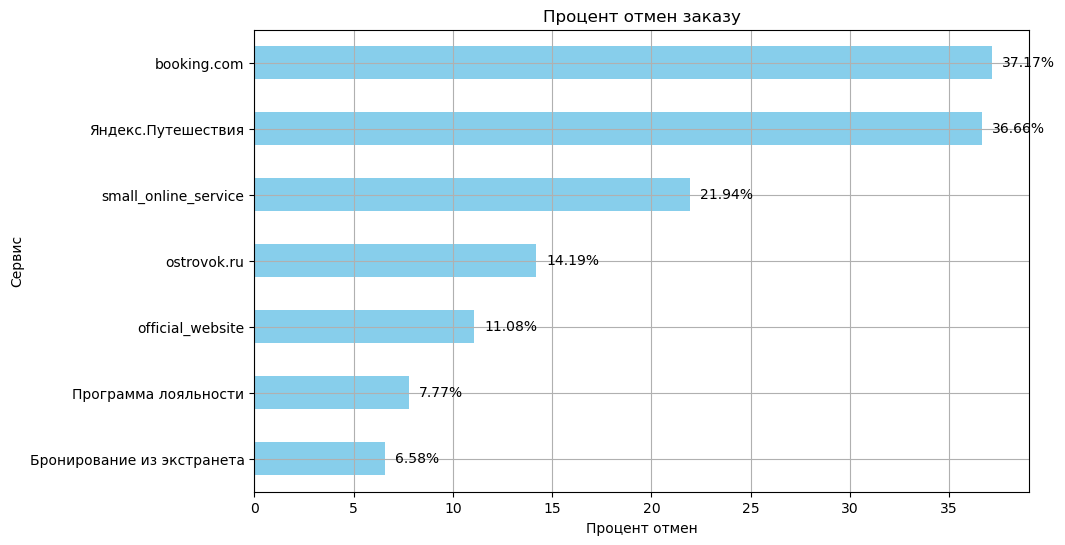

In [15]:
plt.figure(figsize=(10,6))
ax = cancel_percent.sort_values().plot(kind='barh', color='skyblue')

for i, value in enumerate(cancel_percent.sort_values()):
    plt.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=10)

plt.title('Процент отмен заказу')
plt.xlabel('Процент отмен')
plt.ylabel('Сервис')
plt.grid(True)
plt.show()

In [16]:
source_encoded = pd.get_dummies(df['Source'], drop_first=True, sparse=True, dtype=int)
df = pd.concat([df, source_encoded], axis=1)

In [17]:
df = df.fillna(0)

In [18]:
def replace(x):
    if x != 0:
        return 1
    else:
        return 0

In [19]:
df['Дата отмены'] = df['Дата отмены'].apply(replace)

In [20]:
df.head(5)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Гостей,Гостиница,source_count,Праздник/Выходной,official_website,ostrovok.ru,small_online_service,Бронирование из экстранета,Программа лояльности,Яндекс.Путешествия
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,2,1,1132,0,0,0,0,0,0,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,2,1,21077,1,1,0,0,0,0,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,2,4,21077,0,1,0,0,0,0,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,1,3,141,0,0,0,1,0,0,0
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,4,1,21077,1,1,0,0,0,0,0


In [21]:
df.rename(columns = {'Категория номера':'Room_category'}, inplace = True )

In [22]:
total_rooms = df['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df['Room_category'] = df['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

total_rooms = df['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

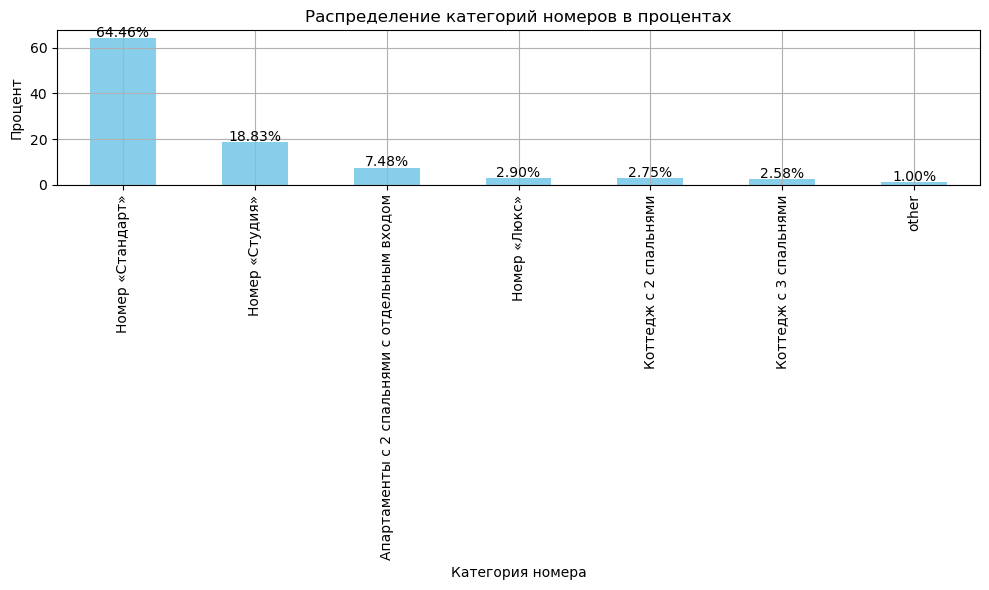

In [23]:
plt.figure(figsize=(10,6))
room_percent.plot(kind='bar', color='skyblue')

for i, value in enumerate(room_percent):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)

plt.title('Распределение категорий номеров в процентах')
plt.xlabel('Категория номера')
plt.ylabel('Процент')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
sr = df.Room_category.value_counts()
display(sr)

Room_category
Номер «Стандарт»                                16872
Номер «Студия»                                   4929
Апартаменты с 2 спальнями с отдельным входом     1957
Номер «Люкс»                                      759
Коттедж с 2 спальнями                             720
Коттедж с 3 спальнями                             676
other                                             261
Name: count, dtype: int64

In [25]:
canceled_orders_room = df[df['Статус брони'] == 'Отмена'].groupby('Room_category').size()

In [26]:
cancel_percent_room = (canceled_orders_room / total_rooms) * 100

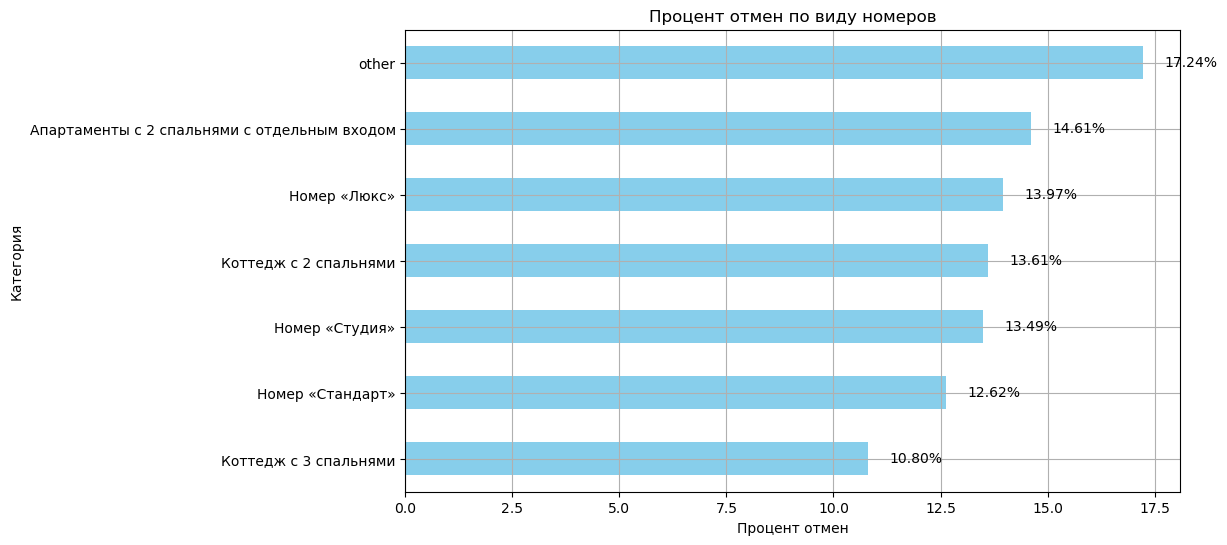

In [27]:
plt.figure(figsize=(10,6))
ax = cancel_percent_room.sort_values().plot(kind='barh', color='skyblue')

for i, value in enumerate(cancel_percent_room.sort_values()):
    plt.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=10)

plt.title('Процент отмен по виду номеров')
plt.xlabel('Процент отмен')
plt.ylabel('Категория')
plt.grid(True)
plt.show()

In [28]:
room_encoded = pd.get_dummies(df['Room_category'], drop_first=True, sparse=True, dtype=int)
df = pd.concat([df, room_encoded], axis=1)

In [29]:
df.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [30]:
df.head(4)

,№ брони,Номеров,Стоимость,Внесена предоплата,Payment,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,small_online_service,Бронирование из экстранета,Программа лояльности,Яндекс.Путешествия,Апартаменты с 2 спальнями с отдельным входом,Коттедж с 2 спальнями,Коттедж с 3 спальнями,Номер «Люкс»,Номер «Стандарт»,Номер «Студия»
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,0,0,0,1,0,0,0,0,1,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,0,0,0,0,0,0,0,0,1,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,0,0,0,0,0,0,0,0,0,1
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,1,0,0,0,0,0,0,0,1,0


In [31]:
total_payment = df['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df['Payment'] = df['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

total_payment = df['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100


C:\Users\Admin\AppData\Local\Temp\ipykernel_996\1566907769.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


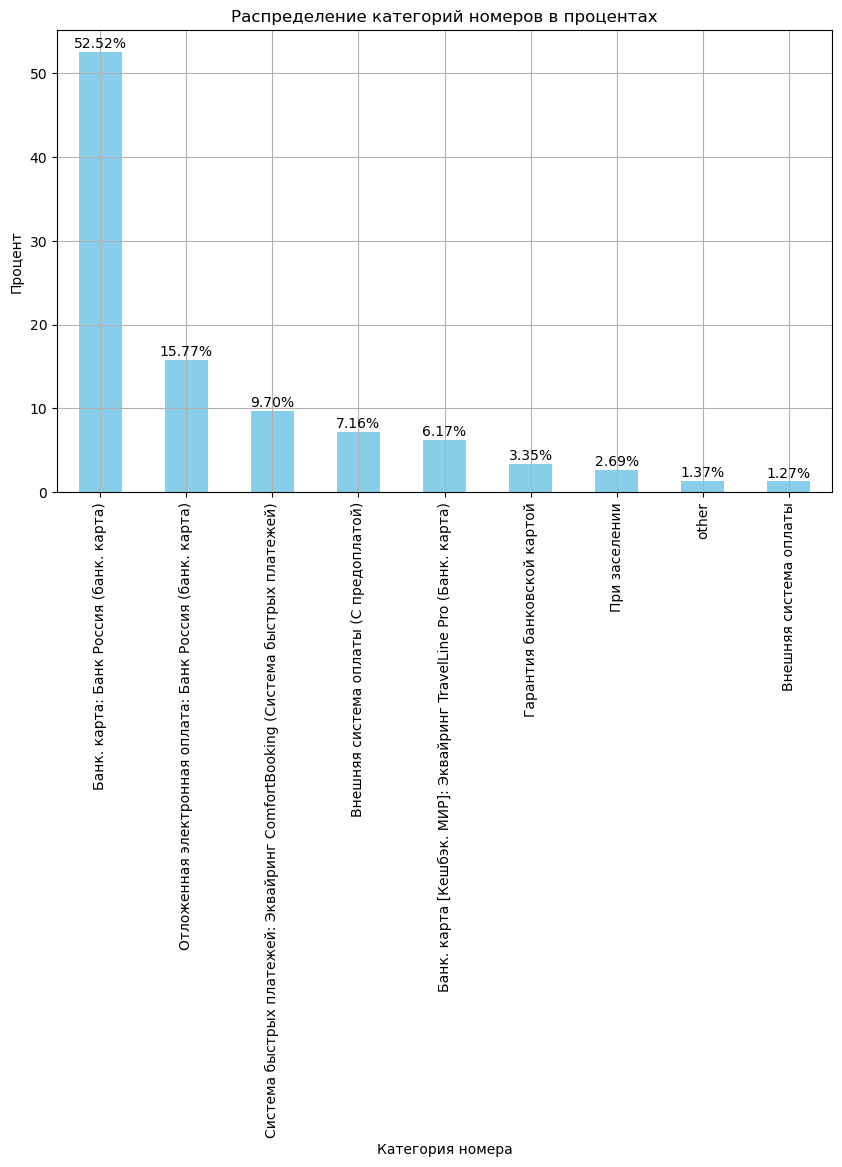

In [32]:

plt.figure(figsize=(10,6))
payment_percent.plot(kind='bar', color='skyblue')

for i, value in enumerate(payment_percent):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)

plt.title('Распределение категорий номеров в процентах')
plt.xlabel('Категория номера')
plt.ylabel('Процент')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
sp = df.Payment.value_counts()
display(sp)

Payment
Банк. карта: Банк Россия (банк. карта)                                           13747
Отложенная электронная оплата: Банк Россия (банк. карта)                          4128
Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)     2539
Внешняя система оплаты (С предоплатой)                                            1875
Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)                 1614
Гарантия банковской картой                                                         876
При заселении                                                                      704
other                                                                              359
Внешняя система оплаты                                                             332
Name: count, dtype: int64

In [34]:
canceled_orders_payment = df[df['Статус брони'] == 'Отмена'].groupby('Payment').size()

In [35]:
cancel_percent_payment = (canceled_orders_payment / total_payment) * 100
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

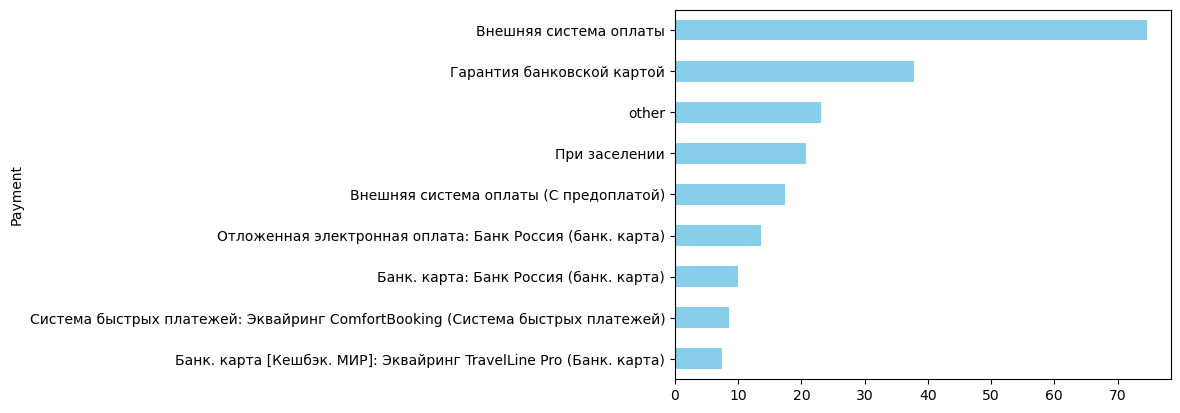

In [36]:
ax = cancel_percent_payment.sort_values().plot(kind='barh', color='skyblue')

In [37]:
for i, value in enumerate(cancel_percent_payment.sort_values()):
    plt.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=10)

plt.title('Процент отмен по виду оплаты')
plt.xlabel('Процент отмен')
plt.ylabel('Категория')
plt.grid(True)
plt.show()

In [38]:
payment_encoded = pd.get_dummies(df['Payment'], drop_first=True, sparse=True, dtype=int)
df = pd.concat([df, payment_encoded], axis=1)

In [39]:
df.head(4)

,№ брони,Номеров,Стоимость,Внесена предоплата,Payment,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,...,Номер «Стандарт»,Номер «Студия»,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта),Банк. карта: Банк Россия (банк. карта),Внешняя система оплаты,Внешняя система оплаты (С предоплатой),Гарантия банковской картой,Отложенная электронная оплата: Банк Россия (банк. карта),При заселении,Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,1,0,0,0,1,0,0,0,0,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,1,0,0,0,0,0,0,1,0,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,0,1,0,1,0,0,0,0,0,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,1,0,0,0,0,1,0,0,0,0


In [40]:
df['month'] = df['Дата бронирования'].apply(lambda x : x.strftime('%m'))

df['delta_day'] = (df['Заезд'] - df['Дата бронирования']).dt.days

In [41]:
df.drop('№ брони',axis = 1,inplace = True)

In [42]:
df1 = df.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [43]:
df1['source_count'] = df1['Source'].map(s)

In [44]:
df1.loc[df1['Source'] == "Официальный сайт", "Source"] = "official_website"
df1.loc[df1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df1.loc[df1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"

In [45]:
df1.rename(columns = {'Источник':'Source'}, inplace = True )
s = df1.Source.value_counts()

In [46]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df1['Регионы'] = df1['Гостиница'].apply(reg)

In [47]:
df2= df1.drop(['Гостиница'],axis = 1)

In [48]:
df0 = pd.get_dummies(df2,columns = ['Source','month', "Room_category"],drop_first=True,dtype = int)

In [49]:
df0.drop(["Payment", "Статус брони", "source_count"], axis = 1, inplace=True)

In [50]:
df0.columns.unique()

Index(['Номеров', 'Стоимость', 'Внесена предоплата', 'Дата отмены', 'Ночей',
       'Гостей', 'Праздник/Выходной', 'official_website', 'ostrovok.ru',
       'small_online_service', 'Бронирование из экстранета',
       'Программа лояльности', 'Яндекс.Путешествия',
       'Апартаменты с 2 спальнями с отдельным входом', 'Коттедж с 2 спальнями',
       'Коттедж с 3 спальнями', 'Номер «Люкс»', 'Номер «Стандарт»',
       'Номер «Студия»',
       'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
       'Банк. карта: Банк Россия (банк. карта)', 'Внешняя система оплаты',
       'Внешняя система оплаты (С предоплатой)', 'Гарантия банковской картой',
       'Отложенная электронная оплата: Банк Россия (банк. карта)',
       'При заселении',
       'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
       'delta_day', 'Регионы', 'Source_official_website', 'Source_ostrovok.ru',
       'Source_small_online_service', 'Source_Бронирование из экстранета',

In [51]:
df0.columns.value_counts()

Номеров                                                                          1
Стоимость                                                                        1
Регионы                                                                          1
Source_official_website                                                          1
Source_ostrovok.ru                                                               1
Source_small_online_service                                                      1
Source_Бронирование из экстранета                                                1
Source_Программа лояльности                                                      1
Source_Яндекс.Путешествия                                                        1
month_02                                                                         1
month_03                                                                         1
month_04                                                                         1
mont

In [52]:
df0.head()

,Номеров,Стоимость,Внесена предоплата,Дата отмены,Ночей,Гостей,Праздник/Выходной,official_website,ostrovok.ru,small_online_service,...,month_09,month_10,month_11,month_12,Room_category_Апартаменты с 2 спальнями с отдельным входом,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Room_category_Номер «Люкс»,Room_category_Номер «Стандарт»,Room_category_Номер «Студия»
0,1,25700.0,0,1,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,24800.0,12400,0,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,25800.0,12900,0,2,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,10500.0,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1,28690.0,28690,0,2,4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df0.drop('Дата отмены',axis = 1)
y = df0['Дата отмены']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y)

In [56]:

from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_test,y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [59]:
rf.score(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.8918492103922567

In [60]:
df_coef = pd.DataFrame({'features':list(X.columns),'coef':rf.feature_importances_})

In [61]:

dfg = df_coef.sort_values('coef',ascending = False)

In [62]:

dfg

,features,coef
2,Внесена предоплата,0.288914
26,delta_day,0.149132
1,Стоимость,0.114412
23,Отложенная электронная оплата: Банк Россия (ба...,0.079461
3,Ночей,0.039585
4,Гостей,0.036167
19,Банк. карта: Банк Россия (банк. карта),0.025163
5,Праздник/Выходной,0.018425
27,Регионы,0.016719
20,Внешняя система оплаты,0.009811


In [63]:
list(dfg[dfg.coef > 0.005].features)

['Внесена предоплата',
 'delta_day',
 'Стоимость',
 'Отложенная электронная оплата: Банк Россия (банк. карта)',
 'Ночей',
 'Гостей',
 'Банк. карта: Банк Россия (банк. карта)',
 'Праздник/Выходной',
 'Регионы',
 'Внешняя система оплаты',
 'month_09',
 'month_03',
 'При заселении',
 'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
 'Source_Яндекс.Путешествия',
 'Source_official_website',
 'Внешняя система оплаты (С предоплатой)',
 'month_02',
 'month_08',
 'month_04',
 'month_05',
 'Номеров',
 'Яндекс.Путешествия',
 'month_07',
 'Бронирование из экстранета',
 'month_06',
 'month_11',
 'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
 'month_10',
 'official_website',
 'month_12',
 'Гарантия банковской картой',
 'Source_Бронирование из экстранета']

In [64]:
ind = list(dfg[dfg.coef > 0.005].features)

In [65]:

rf = RandomForestClassifier()

In [66]:
rf.fit(X_train[ind],y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [68]:

from sklearn.metrics import roc_auc_score

In [70]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [71]:
gb = GradientBoostingClassifier()

gb.fit(X_train[ind],y_train)

gb.score(X_test[ind],y_test)

roc_auc_score(y_test,gb.predict_proba((X_test[ind]))[:,1])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.8597977210018992